In [1]:
# project: p9
# submitter-netid: hpan56
# partner-netid: ncai5

In [2]:
import os   
import pandas as pd
import numpy as np
import json
from collections import namedtuple

In [3]:
def file_path_filter(directory, path = False, filetype = 'None'):
    file = os.listdir(directory)
    i = 0
    while i < len(file):
        if file[i][0] == '.':
            file.pop(i)
            continue
        i += 1
    file = sorted(file, reverse = True)
    if path == True:
        filtered_path = []
        if filetype == 'None':
            for i in range(len(file)):
                filtered_path.append(os.path.join(directory, file[i]))
        else:
            for i in range(len(file)):
                if file[i].split('.')[-1] in filetype:
                    filtered_path.append(os.path.join(directory, file[i]))
        filtered_path = sorted(filtered_path, reverse = True)
        return filtered_path
    return file

In [4]:
#q1
sample_data_file = file_path_filter('sample_data')
sample_data_file

['2.json', '2.csv', '1.json', '1.csv']

In [5]:
#q2
path_q2 = file_path_filter('sample_data', path = True)
path_q2 

['sample_data\\2.json',
 'sample_data\\2.csv',
 'sample_data\\1.json',
 'sample_data\\1.csv']

In [6]:
#q3
path_q3 = file_path_filter('full_data', path = True)
path_q3

['full_data\\meta.info',
 'full_data\\agency_info',
 'full_data\\5.json',
 'full_data\\5.csv',
 'full_data\\4.json',
 'full_data\\4.csv',
 'full_data\\3.json',
 'full_data\\3.csv',
 'full_data\\2.json',
 'full_data\\2.csv',
 'full_data\\1.json',
 'full_data\\1.csv']

In [7]:
#q4
path_q4 = file_path_filter('sample_data', path = True, filetype = ['csv','json'])
path_q4

['sample_data\\2.json',
 'sample_data\\2.csv',
 'sample_data\\1.json',
 'sample_data\\1.csv']

In [8]:
#q5
path_q5 = file_path_filter('full_data', path = True, filetype = ['csv','json'])
path_q5

['full_data\\5.json',
 'full_data\\5.csv',
 'full_data\\4.json',
 'full_data\\4.csv',
 'full_data\\3.json',
 'full_data\\3.csv',
 'full_data\\2.json',
 'full_data\\2.csv',
 'full_data\\1.json',
 'full_data\\1.csv']

In [9]:
Tweet = namedtuple('Tweet', ['tweet_id', 'username', 'num_liked', 'length'])

In [10]:
def getTweet_csv(file):
    data = pd.read_csv(file)
    Tweet_list = []
    for i in range(len(data)):
        if np.isnan(data.loc[i][-1]):
            continue
        else:
            if str(data.loc[i][3])[-1].upper() == 'M':
                tweet_sub = Tweet(tweet_id = str(data.loc[i][0]), username = data.loc[i][2], 
                                  num_liked = int(data.loc[i][3][:-1]) * 1000000,length = len(data.loc[i][4]))
            elif str(data.loc[i][3])[-1].upper() == 'K':
                tweet_sub = Tweet(tweet_id = str(data.loc[i][0]), username = data.loc[i][2], 
                                  num_liked = int(data.loc[i][3][:-1]) * 1000, length = len(data.loc[i][4]))
            else:
                tweet_sub = Tweet(tweet_id = str(data.loc[i][0]), username = data.loc[i][2], 
                                  num_liked = int(data.loc[i][3]), length = len(data.loc[i][4]))
            Tweet_list.append(tweet_sub)
    return Tweet_list

In [11]:
#q6
tweet_list_q6 = getTweet_csv(os.path.join('sample_data','1.csv'))
tweet_list_q6

[Tweet(tweet_id='1467811372', username='USERID_6', num_liked=5882, length=29),
 Tweet(tweet_id='1467811592', username='USERID_8', num_liked=2676, length=11),
 Tweet(tweet_id='1467811594', username='USERID_9', num_liked=2182, length=99),
 Tweet(tweet_id='1467811795', username='USERID_1', num_liked=7791, length=36),
 Tweet(tweet_id='1467812025', username='USERID_1', num_liked=8149, length=25)]

In [12]:
#q7
tweet_list_q7 = getTweet_csv(os.path.join('sample_data','2.csv'))
tweet_list_q7

[Tweet(tweet_id='1467812799', username='USERID_7', num_liked=3340, length=103),
 Tweet(tweet_id='1467812964', username='USERID_10', num_liked=3684, length=93),
 Tweet(tweet_id='1467813137', username='USERID_5', num_liked=6816, length=20),
 Tweet(tweet_id='1467813579', username='USERID_1', num_liked=1348, length=64),
 Tweet(tweet_id='1467813782', username='USERID_1', num_liked=4770, length=79)]

In [13]:
#q8
tweet_list_q8 = getTweet_csv(os.path.join('full_data','1.csv'))
tweet_list_q8

[Tweet(tweet_id='1467844540', username='USERID_9', num_liked=6366, length=49),
 Tweet(tweet_id='1467844907', username='USERID_3', num_liked=8770, length=42),
 Tweet(tweet_id='1467845095', username='USERID_4', num_liked=8567, length=126),
 Tweet(tweet_id='1467845157', username='USERID_8', num_liked=5761, length=17),
 Tweet(tweet_id='1467852031', username='USERID_2', num_liked=4565, length=63),
 Tweet(tweet_id='1467852067', username='USERID_4', num_liked=9594, length=34),
 Tweet(tweet_id='1467852789', username='USERID_10', num_liked=686, length=44),
 Tweet(tweet_id='1467853135', username='USERID_1', num_liked=6515, length=131),
 Tweet(tweet_id='1467853356', username='USERID_10', num_liked=3192, length=136),
 Tweet(tweet_id='1467853431', username='USERID_10', num_liked=9936, length=30),
 Tweet(tweet_id='1467853479', username='USERID_9', num_liked=4939, length=24),
 Tweet(tweet_id='1467854062', username='USERID_10', num_liked=9346, length=92),
 Tweet(tweet_id='1467854345', username='USERID

In [14]:
#q9
tweet_list_q9 = getTweet_csv(os.path.join('full_data','2.csv'))
tweet_list_q9

[Tweet(tweet_id='1467876711', username='USERID_10', num_liked=1117, length=84),
 Tweet(tweet_id='1467877496', username='USERID_1', num_liked=2062, length=106),
 Tweet(tweet_id='1467877833', username='USERID_2', num_liked=4270, length=89),
 Tweet(tweet_id='1467877865', username='USERID_1', num_liked=5899, length=30),
 Tweet(tweet_id='1467878057', username='USERID_6', num_liked=703, length=42),
 Tweet(tweet_id='1467878557', username='USERID_6', num_liked=5814, length=61),
 Tweet(tweet_id='1467878633', username='USERID_2', num_liked=2351, length=33),
 Tweet(tweet_id='1467878971', username='USERID_2', num_liked=2238, length=27),
 Tweet(tweet_id='1467878983', username='USERID_8', num_liked=4860, length=61),
 Tweet(tweet_id='1467879480', username='USERID_4', num_liked=1345, length=97),
 Tweet(tweet_id='1467879984', username='USERID_2', num_liked=3694, length=69),
 Tweet(tweet_id='1467880085', username='USERID_4', num_liked=2478, length=120),
 Tweet(tweet_id='1467880431', username='USERID_3',

In [1]:
def getTweet_json(file):
    Tweet_list = []
    try:
        with open(file, encoding="utf-8") as f:
            data = json.load(f)
        for i in data:
            if str(data[i]['num_liked'])[-1].upper() == 'M':
                tweet = Tweet(tweet_id = i, username = data[i]['username'], num_liked = int(data[i]['num_liked'][:-1]) * 1000000, 
                              length = len(data[i]['tweet_text']))
            elif str(data[i]['num_liked'])[-1].upper() == 'K':
                tweet = Tweet(tweet_id = i, username = data[i]['username'], num_liked = int(data[i]['num_liked'][:-1]) * 1000, 
                              length = len(data[i]['tweet_text']))
            elif type(data[i]['num_liked']) == str:
                tweet = Tweet(tweet_id = i, username = data[i]['username'], num_liked = 0, 
                              length = len(data[i]['tweet_text']))
            elif type(data[i]['num_liked']) == int:
                tweet = Tweet(tweet_id = i, username = data[i]['username'], num_liked = int(data[i]['num_liked']), 
                              length = len(data[i]['tweet_text']))    
            Tweet_list.append(tweet)
        return Tweet_list
    except:
        return Tweet_list

In [16]:
#q10
tweet_list_q10 = getTweet_json(os.path.join("sample_data","1.json"))
tweet_list_q10

[Tweet(tweet_id='1467810369', username='USERID_4', num_liked=315, length=115),
 Tweet(tweet_id='1467810672', username='USERID_8', num_liked=5298, length=111),
 Tweet(tweet_id='1467810917', username='USERID_8', num_liked=533, length=89),
 Tweet(tweet_id='1467811184', username='USERID_6', num_liked=2650, length=47),
 Tweet(tweet_id='1467811193', username='USERID_8', num_liked=2101, length=111)]

In [17]:
#q11
tweet_list_q11 = getTweet_json(os.path.join("sample_data","2.json"))
tweet_list_q11

[Tweet(tweet_id='1467812416', username='USERID_9', num_liked=5278, length=43),
 Tweet(tweet_id='1467812579', username='USERID_1', num_liked=9700, length=26),
 Tweet(tweet_id='1467812723', username='USERID_3', num_liked=5414, length=94),
 Tweet(tweet_id='1467812771', username='USERID_8', num_liked=2190, length=77),
 Tweet(tweet_id='1467812784', username='USERID_10', num_liked=2667, length=117)]

In [18]:
#q12
tweet_list_q12 = getTweet_json(os.path.join("full_data","5.json"))
tweet_list_q12

[Tweet(tweet_id='1467944581', username='USERID_1', num_liked=7216, length=131),
 Tweet(tweet_id='1467944654', username='USERID_7', num_liked=2838, length=59),
 Tweet(tweet_id='1467944871', username='USERID_1', num_liked=9393, length=51),
 Tweet(tweet_id='1467945476', username='USERID_10', num_liked=9246, length=33),
 Tweet(tweet_id='1467945704', username='USERID_1', num_liked=526, length=62),
 Tweet(tweet_id='1467945787', username='USERID_9', num_liked=8850, length=81),
 Tweet(tweet_id='1467945885', username='USERID_4', num_liked=9403, length=67),
 Tweet(tweet_id='1467946026', username='USERID_1', num_liked=2861, length=69),
 Tweet(tweet_id='1467946137', username='USERID_1', num_liked=5470, length=135),
 Tweet(tweet_id='1467946559', username='USERID_6', num_liked=987, length=116),
 Tweet(tweet_id='1467946592', username='USERID_3', num_liked=9085, length=137),
 Tweet(tweet_id='1467946749', username='USERID_4', num_liked=3381, length=42),
 Tweet(tweet_id='1467946810', username='USERID_4'

In [19]:
#q13
tweet_list_q13 = getTweet_json(os.path.join("full_data","1.json"))
tweet_list_q13

[]

In [20]:
def search_id(path, id_num):
    files = file_path_filter(directory = path, path = True, filetype = ['csv', 'json'])
    for i in range(len(files)):
        if files[i].split('.')[1] == 'csv':
            Tweet_list = getTweet_csv(files[i])
        else:
            Tweet_list = getTweet_json(files[i])
        for j in range(len(Tweet_list)):
            if id_num in Tweet_list[j]:
                return files[i]
    return False

In [21]:
#q14
file_q14 = search_id('sample_data','1467813137')
file_q14

'sample_data\\2.csv'

In [22]:
#q15
file_q15 = search_id('full_data','1467862937')
file_q15

False

In [23]:
#q16
file_q16 = search_id('full_data','1467907751')
file_q16

'full_data\\3.csv'

In [24]:
def search_user(path, user):
    files = file_path_filter(directory = path, path = True, filetype = ['csv', 'json'])
    users = []
    for i in range(len(files)):
        if files[i].split('.')[1] == 'csv':
            Tweet_list = getTweet_csv(files[i])
        else:
            Tweet_list = getTweet_json(files[i])
        for j in range(len(Tweet_list)):
            if user in Tweet_list[j]:
                users.append(files[i])
                break
    return users

In [25]:
#q17
file_q17 = search_user('sample_data', 'USERID_1')
file_q17

['sample_data\\2.json', 'sample_data\\2.csv', 'sample_data\\1.csv']

In [26]:
def getTweet(path):
    files = file_path_filter(directory = path, path = True, filetype = ['csv', 'json'])
    tweet_list = []
    for i in range(len(files)):
        if files[i].split('.')[1] == 'csv':
            tweet_list = tweet_list + getTweet_csv(files[i])
        else:
            tweet_list = tweet_list + getTweet_json(files[i])
    return tweet_list

In [27]:
#q18
tweet_q18 = getTweet('sample_data')
sorted(tweet_q18, key = lambda Tweet: int(Tweet.tweet_id))

[Tweet(tweet_id='1467810369', username='USERID_4', num_liked=315, length=115),
 Tweet(tweet_id='1467810672', username='USERID_8', num_liked=5298, length=111),
 Tweet(tweet_id='1467810917', username='USERID_8', num_liked=533, length=89),
 Tweet(tweet_id='1467811184', username='USERID_6', num_liked=2650, length=47),
 Tweet(tweet_id='1467811193', username='USERID_8', num_liked=2101, length=111),
 Tweet(tweet_id='1467811372', username='USERID_6', num_liked=5882, length=29),
 Tweet(tweet_id='1467811592', username='USERID_8', num_liked=2676, length=11),
 Tweet(tweet_id='1467811594', username='USERID_9', num_liked=2182, length=99),
 Tweet(tweet_id='1467811795', username='USERID_1', num_liked=7791, length=36),
 Tweet(tweet_id='1467812025', username='USERID_1', num_liked=8149, length=25),
 Tweet(tweet_id='1467812416', username='USERID_9', num_liked=5278, length=43),
 Tweet(tweet_id='1467812579', username='USERID_1', num_liked=9700, length=26),
 Tweet(tweet_id='1467812723', username='USERID_3', 

In [28]:
#q19
sorted(tweet_q18, key = lambda Tweet: int(Tweet.num_liked), reverse = True)

[Tweet(tweet_id='1467812579', username='USERID_1', num_liked=9700, length=26),
 Tweet(tweet_id='1467812025', username='USERID_1', num_liked=8149, length=25),
 Tweet(tweet_id='1467811795', username='USERID_1', num_liked=7791, length=36),
 Tweet(tweet_id='1467813137', username='USERID_5', num_liked=6816, length=20),
 Tweet(tweet_id='1467811372', username='USERID_6', num_liked=5882, length=29),
 Tweet(tweet_id='1467812723', username='USERID_3', num_liked=5414, length=94),
 Tweet(tweet_id='1467810672', username='USERID_8', num_liked=5298, length=111),
 Tweet(tweet_id='1467812416', username='USERID_9', num_liked=5278, length=43),
 Tweet(tweet_id='1467813782', username='USERID_1', num_liked=4770, length=79),
 Tweet(tweet_id='1467812964', username='USERID_10', num_liked=3684, length=93),
 Tweet(tweet_id='1467812799', username='USERID_7', num_liked=3340, length=103),
 Tweet(tweet_id='1467811592', username='USERID_8', num_liked=2676, length=11),
 Tweet(tweet_id='1467812784', username='USERID_10

In [29]:
#q20
tweet_q20 = getTweet('full_data')
sorted(tweet_q20, key = lambda Tweet: int(Tweet.num_liked), reverse = True)[:20]

[Tweet(tweet_id='1467894593', username='USERID_2', num_liked=869000000, length=136),
 Tweet(tweet_id='1467894600', username='USERID_8', num_liked=915000, length=67),
 Tweet(tweet_id='1467853431', username='USERID_10', num_liked=9936, length=30),
 Tweet(tweet_id='1467875163', username='USERID_2', num_liked=9891, length=69),
 Tweet(tweet_id='1467860904', username='USERID_7', num_liked=9851, length=30),
 Tweet(tweet_id='1467928014', username='USERID_7', num_liked=9830, length=18),
 Tweet(tweet_id='1467895048', username='USERID_10', num_liked=9822, length=136),
 Tweet(tweet_id='1467966646', username='USERID_7', num_liked=9821, length=47),
 Tweet(tweet_id='1467855673', username='USERID_9', num_liked=9728, length=72),
 Tweet(tweet_id='1467898078', username='USERID_10', num_liked=9705, length=104),
 Tweet(tweet_id='1467928300', username='USERID_9', num_liked=9681, length=79),
 Tweet(tweet_id='1467917177', username='USERID_3', num_liked=9678, length=105),
 Tweet(tweet_id='1467923235', username

In [30]:
#q21
len(tweet_q20)

445

In [31]:
#q22
users_q22 = []
for i in tweet_q20:
    if i.username not in users_q22:
        users_q22.append(i.username)
users_q22 = set(users_q22)
users_q22

{'USERID_1',
 'USERID_10',
 'USERID_2',
 'USERID_3',
 'USERID_4',
 'USERID_5',
 'USERID_6',
 'USERID_7',
 'USERID_8',
 'USERID_9'}

In [32]:
#q23
user_prolific = {}
for i in tweet_q20:
    if i.username not in user_prolific:
        user_prolific[i.username] = 1
    else:
        user_prolific[i.username] += 1
user_prolific

{'USERID_1': 52,
 'USERID_7': 55,
 'USERID_10': 45,
 'USERID_9': 44,
 'USERID_4': 35,
 'USERID_6': 51,
 'USERID_3': 39,
 'USERID_2': 47,
 'USERID_5': 46,
 'USERID_8': 31}

In [33]:
#q24
user_total_like = {}
user_popular = {}
for i in tweet_q20:
    if i.username not in user_total_like:
        user_total_like[i.username] = i.num_liked
    else:
        user_total_like[i.username] += i.num_liked
for i in user_total_like:
    user_popular[i] = user_total_like[i] / user_prolific[i]
user_popular

{'USERID_1': 4369.115384615385,
 'USERID_7': 5079.436363636363,
 'USERID_10': 5728.777777777777,
 'USERID_9': 5334.386363636364,
 'USERID_4': 4578.8,
 'USERID_6': 4559.588235294118,
 'USERID_3': 5023.820512820513,
 'USERID_2': 18494258.80851064,
 'USERID_5': 4583.130434782609,
 'USERID_8': 34463.45161290323}

In [34]:
#q25
user_total_len = {}
user_verbose = {}
for i in tweet_q20:
    if i.username not in user_total_len:
        user_total_len[i.username] = i.length
    else:
        user_total_len[i.username] += i.length
for i in user_total_len:
    user_verbose[i] = user_total_len[i] / user_prolific[i]
user_verbose

{'USERID_1': 81.86538461538461,
 'USERID_7': 72.96363636363637,
 'USERID_10': 72.71111111111111,
 'USERID_9': 78.36363636363636,
 'USERID_4': 73.91428571428571,
 'USERID_6': 73.68627450980392,
 'USERID_3': 67.15384615384616,
 'USERID_2': 79.51063829787235,
 'USERID_5': 73.69565217391305,
 'USERID_8': 73.96774193548387}

In [35]:
%matplotlib inline

In [3]:
def scatter(x, y, xlabel="please label me!", ylabel="please label me!"):
    df = pd.DataFrame({"x":x, "y":y})
    ax = df.plot.scatter(x="x", y="y", color="black", fontsize=16, xlim=0, ylim=0)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)

number_tweets = []
average_length = []
average_likes = []
for i in user_verbose:
    average_length.append(user_verbose[i])
    number_tweets.append(user_prolific[i])
    average_likes.append(user_popular[i])

NameError: name 'user_verbose' is not defined

In [2]:
#q26
scatter(number_tweets, average_length, xlabel="Number of Tweets", ylabel="Average Length")

NameError: name 'scatter' is not defined

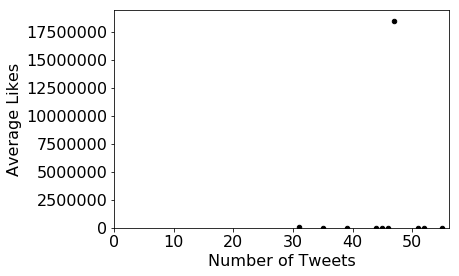

In [38]:
#q27
scatter(number_tweets, average_likes, xlabel="Number of Tweets", ylabel="Average Likes")

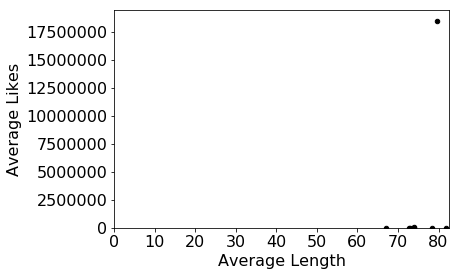

In [39]:
#q28
scatter(average_length, average_likes, xlabel="Average Length", ylabel="Average Likes")

In [40]:
#q29
user_q29 = list(user_popular.keys())[list(user_popular.values()).index(max(user_popular.values()))]
user_q29

'USERID_2'

In [41]:
#q30
user2_tweet = []
for i in tweet_q20:
    if i.username == user_q29:
        user2_tweet.append(i)
user2_tweet = sorted(user2_tweet, key = lambda x : x.num_liked, reverse = True)
user2_tweet

[Tweet(tweet_id='1467894593', username='USERID_2', num_liked=869000000, length=136),
 Tweet(tweet_id='1467875163', username='USERID_2', num_liked=9891, length=69),
 Tweet(tweet_id='1467862806', username='USERID_2', num_liked=9465, length=68),
 Tweet(tweet_id='1467907751', username='USERID_2', num_liked=9048, length=110),
 Tweet(tweet_id='1467928764', username='USERID_2', num_liked=9026, length=41),
 Tweet(tweet_id='1467943007', username='USERID_2', num_liked=9000, length=130),
 Tweet(tweet_id='1467918682', username='USERID_2', num_liked=8884, length=102),
 Tweet(tweet_id='1467935121', username='USERID_2', num_liked=8740, length=37),
 Tweet(tweet_id='1467947913', username='USERID_2', num_liked=8578, length=36),
 Tweet(tweet_id='1467892667', username='USERID_2', num_liked=8270, length=20),
 Tweet(tweet_id='1467897316', username='USERID_2', num_liked=7890, length=64),
 Tweet(tweet_id='1467854917', username='USERID_2', num_liked=7741, length=30),
 Tweet(tweet_id='1467961106', username='USE

In [42]:
#q31
total_q31 = 0
for i in user2_tweet:
    total_q31 += i.num_liked
user2_tweet[0].num_liked / total_q31 * 100

99.97352093731529

In [43]:
#q32
(user_popular[user_q29] * user_prolific[user_q29] - user2_tweet[0].num_liked) / (user_prolific[user_q29] - 1)

5003.565217391304

In [44]:
def list_files(path):
    path_list = []
    path_dir = []
    list_dir = os.listdir(path)
    for i in list_dir:
        if os.path.isfile(os.path.join(path, i)):
            if i[0] != ".":
                path_list.append(os.path.join(path, i))
        elif os.path.isdir(os.path.join(path, i)):
            path_dir.append(os.path.join(path, i))
    for i in path_dir:
        path_list = list_files(i) + path_list
    return path_list

In [45]:
#q33
sorted(list_files(os.path.join("play", "rb", "rb9")), reverse = True)

['play\\rb\\rb9\\89.csv', 'play\\rb\\rb9\\12.xls']

In [46]:
#q34
sorted(list_files(os.path.join("play", "ls")), reverse = True)

['play\\ls\\qwe\\usun.pdf',
 'play\\ls\\qwe\\iuqwe.json',
 'play\\ls\\mf.py',
 'play\\ls\\lu.txt']

In [47]:
#q35
sorted(list_files(os.path.join("play", "ou")), reverse = True)

['play\\ou\\v',
 'play\\ou\\quap\\uikwe',
 'play\\ou\\quap\\qonxu.txt',
 'play\\ou\\quap\\aoq\\qsonj',
 'play\\ou\\quap\\aoq\\aqnsa',
 'play\\ou\\b',
 'play\\ou\\a']

In [48]:
#q36
sorted(list_files("play"), reverse = True)

['play\\rb\\rb9\\89.csv',
 'play\\rb\\rb9\\12.xls',
 'play\\rb\\ppt.ppt',
 'play\\ou\\v',
 'play\\ou\\quap\\uikwe',
 'play\\ou\\quap\\qonxu.txt',
 'play\\ou\\quap\\aoq\\qsonj',
 'play\\ou\\quap\\aoq\\aqnsa',
 'play\\ou\\b',
 'play\\ou\\a',
 'play\\ls\\qwe\\usun.pdf',
 'play\\ls\\qwe\\iuqwe.json',
 'play\\ls\\mf.py',
 'play\\ls\\lu.txt']

In [49]:
#q37
sorted(list_files(os.path.join("recursive", "others")), reverse = True)

['recursive\\others\\USERID_9.json',
 'recursive\\others\\USERID_8.json',
 'recursive\\others\\USERID_7.json',
 'recursive\\others\\USERID_6.json',
 'recursive\\others\\USERID_5.json',
 'recursive\\others\\USERID_10.json']

In [50]:
#q38
sorted(list_files("recursive"), reverse = True)

['recursive\\others\\USERID_9.json',
 'recursive\\others\\USERID_8.json',
 'recursive\\others\\USERID_7.json',
 'recursive\\others\\USERID_6.json',
 'recursive\\others\\USERID_5.json',
 'recursive\\others\\USERID_10.json',
 'recursive\\USERID_4\\true\\tweets.json',
 'recursive\\USERID_4\\false\\tweets.json',
 'recursive\\USERID_3\\tweets.json',
 'recursive\\USERID_2\\tweets.json',
 'recursive\\USERID_1\\tweets.json']

In [51]:
#q39
path_q39 = list_files(os.path.join("recursive", "USERID_4"))
Tweet_q39 = []
for i in path_q39:
    try:
        tweet_q39 = getTweet_json(i)
    except:
        pass
    try:
        tweet_q39 = getTweet_csv(i)
    except:
        pass
    Tweet_q39 = tweet_q39 + Tweet_q39
len(Tweet_q39)

17

In [52]:
#q40
path_q40 = list_files("recursive")
Tweet_q40 = []
for i in path_q40:
    try:
        tweet_q40 = getTweet_json(i)
    except:
        pass
    try:
        tweet_q40 = getTweet_csv(i)
    except:
        pass
    Tweet_q40 = tweet_q40 + Tweet_q40
len(Tweet_q40)

200